## Cơ chế tương tác giữa chu kỳ thời gian (mùa/giờ) và các yếu tố hoàn lưu khí quyển (áp suất/gió) định hình quy luật và cường độ mưa tại Huế như thế nào?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.patheffects as pe
from math import pi
from sklearn.preprocessing import MinMaxScaler

In [2]:
headers = ['datetime', 'temperature', 'humidity',
       'precipitation', 'windspeed', 'winddirection',
       'pressure', 'dewpoint', 'month', 'hour', 'season',
       'day_night', 'location_id']
df = pd.read_csv("../data/processed/weather_processed.csv", header=0, names=headers)
df.head(3)

,datetime,temperature,humidity,precipitation,windspeed,winddirection,pressure,dewpoint,month,hour,season,day_night,location_id
0,2024-01-01 00:00:00,21.8,99.0,0.0,3.6,230.0,1016.9,21.6,1,0,Dry,Night,1
1,2024-01-01 01:00:00,22.0,94.0,0.0,1.8,220.0,1017.0,21.0,1,1,Dry,Night,1
2,2024-01-01 02:00:00,23.0,94.0,0.2,3.6,280.0,1017.0,22.0,1,2,Dry,Night,1


## Thay đổi tổng quan

In [3]:
rain_df = df[df['precipitation'] > 0].reset_index(drop=True)

### 1. Lượng mưa theo tháng

**Khác biệt về lượng mưa giữa các tháng qua từng năm**

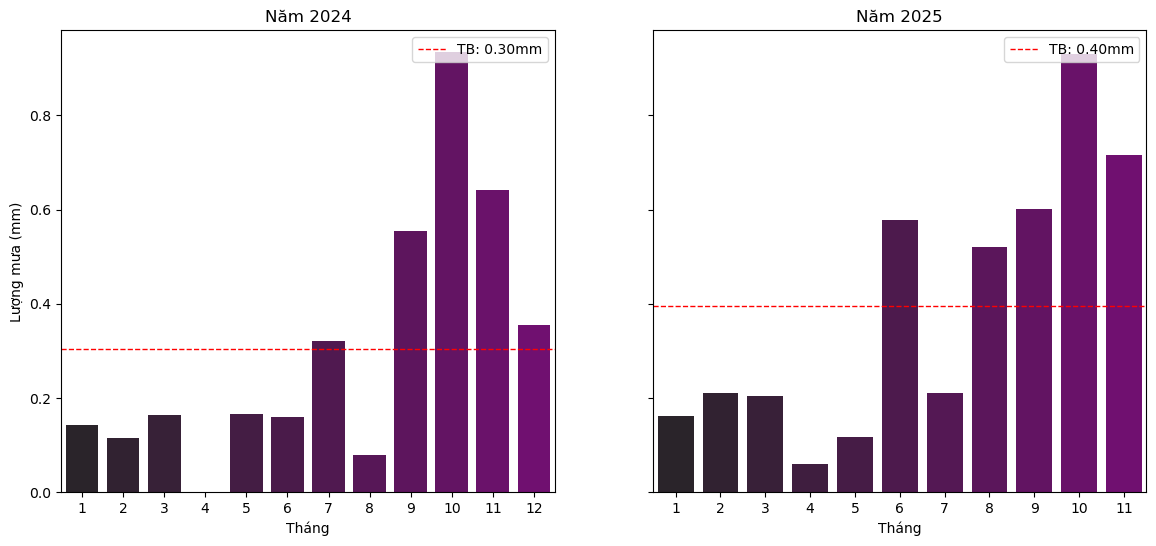

In [4]:
df["datetime"] = pd.to_datetime(df["datetime"]) # Ép kiểu
df["year"] = df["datetime"].dt.year # Tạo cột năm

# Chuẩn bị dữ liệu
years = sorted(df["year"].unique())
n_years = len(years)
cols = 2
rows = (n_years + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 6 * rows), sharey=True)
axes = axes.flatten()

# Trực quan hóa
for ax, year in zip(axes, years):
    data_year = df[df["year"] == year]
    year_mean = data_year["precipitation"].mean()
    
    sns.barplot(
        data=data_year,
        x="month",
        y="precipitation",
        hue='month',
        legend=False,
        estimator="mean",
        errorbar=None,
        ax=ax,
        palette="dark:purple"
    )

    ax.axhline(
        y=year_mean,
        color="red",
        linestyle="--",
        linewidth=1,
        label=f'TB: {year_mean:.2f}mm' # Hiển thị con số TB
    )
    ax.legend(loc='upper right')

    ax.set_title(f"Năm {year}")
    ax.set_xlabel("Tháng")
    ax.set_ylabel("Lượng mưa (mm)")

# Xóa ax dư
for i in range(len(years), len(axes)):
    fig.delaxes(axes[i])

**Nhận xét**: Về tổng quan, dữ liệu cho thấy đặc trưng khí hậu nhiệt đới gió mùa khắc nghiệt của Huế với sự phân hóa sâu sắc giữa mùa mưa và mùa khô.

**Tính mùa vụ**: Dữ liệu khẳng định quy luật "mùa mưa lệch về cuối năm" đặc trưng của miền Trung.

- Cao điểm: Lượng mưa luôn tập trung dồn dập vào quý 4 (tháng 10, 11, 12). Trong đó, Tháng 10 là tháng cực đoan nhất, thường xuyên đạt đỉnh với cường độ trung bình xấp xỉ hoặc vượt 1.0 mm/h (tương đương >700mm/tháng) vào các năm 2021, 2023 và 2025.

- Thấp điểm: Từ tháng 1 đến tháng 8 thường là mùa khô/ít mưa, với lượng mưa trung bình giờ thường dưới 0.2 mm/h.
    
**Điểm bất thường**: Sự biến đổi khí hậu đang phá vỡ quy luật mùa vụ truyền thống.

- *Năm 2022 - Mưa lũ trái mùa*:

    - Đây là năm có lượng mưa trung bình cao nhất trong chuỗi (TB: 0.41 mm/h).

    - Hiện tượng mưa trái mùa: Tháng 4 và tháng 5 (thường là mùa khô) lại xuất hiện lượng mưa đột biến (đạt ~0.8 mm/h vào tháng 4), cao gấp 8-10 lần so với cùng kỳ các năm khác. Điều này cho thấy rủi ro ngập lụt cục bộ vào thời điểm người dân ít đề phòng nhất.

    - Tháng 12/2022 vẫn duy trì lượng mưa cực lớn, kéo dài mùa mưa sang tận cuối năm dương lịch.

- *Năm 2025 - Sự xáo trộn giữa năm*:

    - Xuất hiện đỉnh mưa bất thường vào tháng 6 (vượt 0.5 mm/h), trong khi đây vốn là giai đoạn cao điểm nắng nóng và gió Lào tại miền Trung.

    - Mức trung bình năm 2025 (0.40) tiệm cận mức kỷ lục của năm 2022, báo hiệu một năm thời tiết cực đoan.
    
**Xu hướng-Quy luật của dữ liệu**:

- Cường độ mưa không giảm: Các đỉnh mưa qua các năm vẫn duy trì ở mức rất cao (~1.0 mm/h), cho thấy cường độ các đợt mưa lũ tại Huế không có dấu hiệu suy giảm.

- Sự dịch chuyển mùa mưa: Không chỉ gói gọn trong tháng 9-12, các đợt mưa lớn đang có xu hướng xuất hiện rải rác vào các tháng vốn được coi là an toàn (Tháng 4/2022, Tháng 6/2025). Độ biến động của dữ liệu giữa các tháng trong cùng một năm ngày càng lớn.

**Khác biệt về lượng mưa giữa các tháng trong năm như thế nào ?**

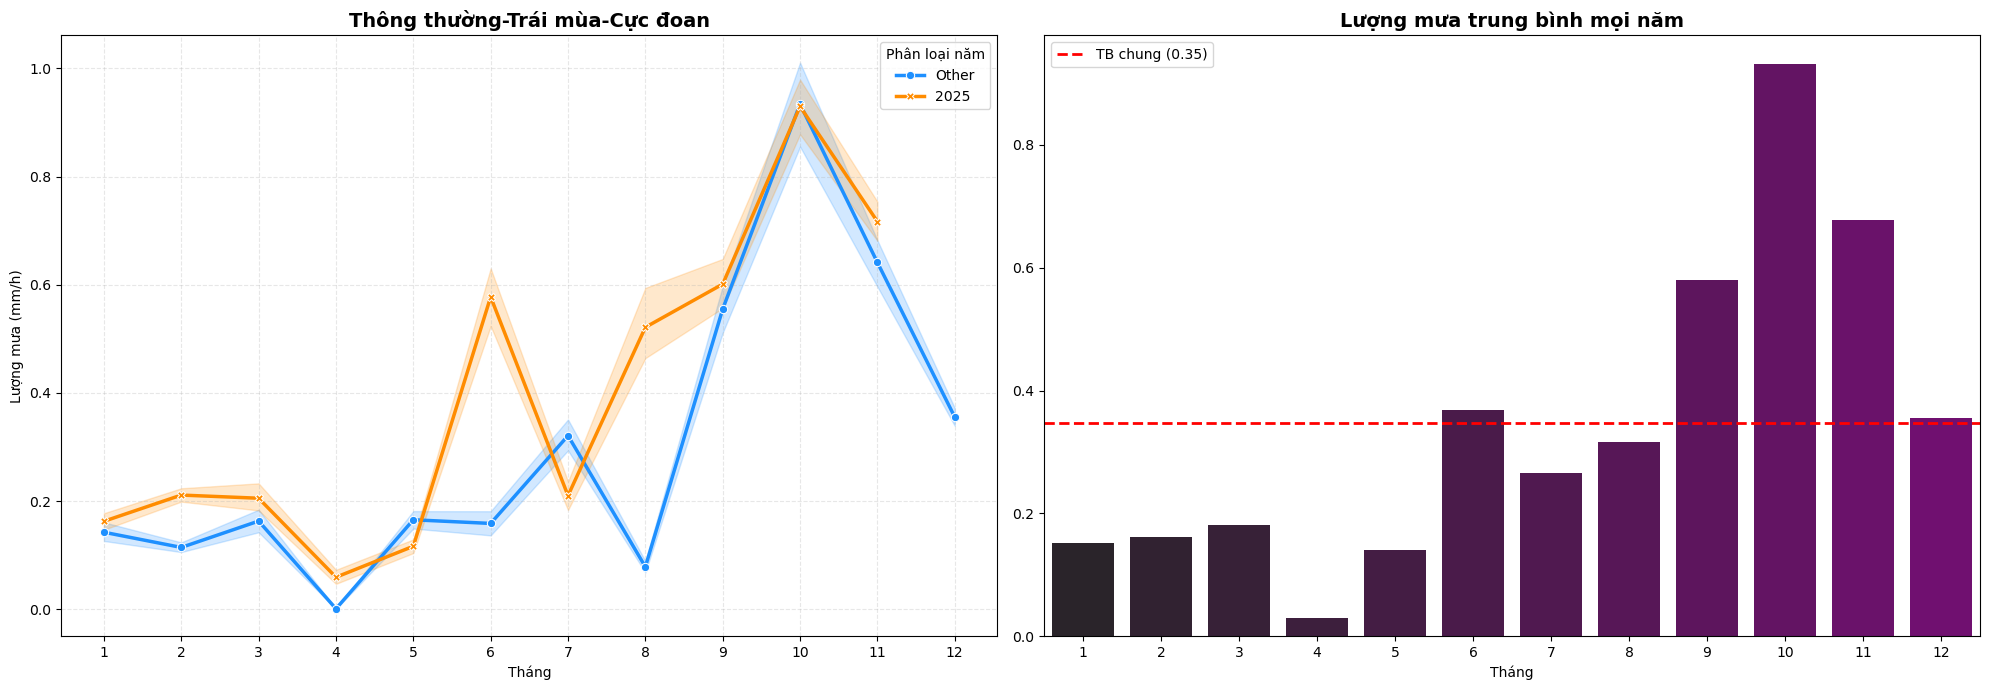

In [5]:
# Tạo cột phân loại Group
def categorize_year(year):
    if year == 2022 or year == 2025:
        return year
    else:
        return 'Other'
df['group'] = df['year'].apply(categorize_year)

fig, axes = plt.subplots(1, 2, figsize=(20, 7)) # 1 hàng, 2 cột

# Lineplot
custom_palette = {
    'Other': "dodgerblue",    # Nhóm ổn định
    2022: "red",              # Trái mùa
    2025: "darkorange"        # Kỷ lục
}

sns.lineplot(
    data=df, 
    x="month", 
    y="precipitation", 
    hue="group",
    style="group",
    estimator="mean",
    dashes=False,
    markers=True,
    palette=custom_palette,
    linewidth=2.5,
    errorbar=('ci', 95),
    ax=axes[0]
)

axes[0].set_title("Thông thường-Trái mùa-Cực đoan", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Tháng")
axes[0].set_ylabel("Lượng mưa (mm/h)")
axes[0].set_xticks(range(1, 13))
axes[0].grid(alpha=0.3, linestyle='--')
axes[0].legend(title="Phân loại năm")

# Barplot
# Tính trung bình chung
global_mean = df["precipitation"].mean()

sns.barplot(data=df, x="month", y="precipitation",
            hue='month', legend=False, errorbar=None,
            estimator='mean', palette='dark:purple',
            ax=axes[1]
)

# Vẽ đường trung bình
axes[1].axhline(y=global_mean, color='red', linestyle='--', linewidth=2, label=f'TB chung ({global_mean:.2f})')

axes[1].set_title("Lượng mưa trung bình mọi năm", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Tháng")
axes[1].set_ylabel("")
axes[1].legend()

plt.tight_layout()
plt.show()

**Nhận xét**:

- **Đỉnh 10**: Tháng 10 là tháng "bất biến". Dù thời tiết các tháng khác có biến động ra sao, tháng 10 luôn là tháng mặc định có mưa cực đại. Đây là đặc tính bền vững nhất của khí hậu Huế.

- **Đáy giả**: Theo lý thuyết, tháng 4 và tháng 6 là trong giai đoạn khô hạn. Tuy nhiên, dữ liệu tháng 4/2022 và tháng 6/2025 cho thấy các đáy này có thể tăng đột ngột, thậm chí tạo thành đỉnh phụ. Điều này khiến việc "Mùa khô thì ít mưa" có thể không còn đúng trong tương lai.

- **Khởi đầu nhanh - Kết thúc chậm**: Thời tiết Huế có quán tính lớn về cuối năm. Lũ lụt thường dai dẳng vào tháng 11, 12 do đất đã bão hòa nước từ tháng 10 và lượng mưa không chịu giảm nhiệt ngay lập tức.
    
    - Khởi đầu (Tháng 8-9): Đường biểu đồ dựng đứng rất dốc. Lượng mưa tăng gấp 2-3 lần chỉ trong 1 tháng. Cho thấy mùa mưa đến nhanh và bất ngờ.
    
    - Kết thúc (Tháng 10-12): Sau tháng 10, lượng mưa giảm dần nhưng vẫn duy trì ở mức cao, hơn hẳn các tháng đầu năm.
    
- **Quy luật bù trừ**: Năm 2022 mưa cực lớn vào tháng 4 (trái mùa), nhưng đến tháng 11 (chính vụ) thì đường màu đỏ lại tụt sâu xuống thấp hơn hẳn so với đường màu xanh và cam. Gần như tồn tại *Ngân sách mưa* trong năm. Nếu mưa to ở đầu năm, dữ liệu có xu hướng mưa thấp ở cuối năm. Vì chỉ xuất hiện 1 lần ở năm 2022, ta cần thêm dữ liệu để xác định quy luật này.

> Phân tích khác biệt về thuộc tính thời tiết của các năm/tháng mưa ít-mưa nhiều-cực đoan có thể làm rõ *Quy luật mưa*.

### 2. Lượng mưa theo giờ

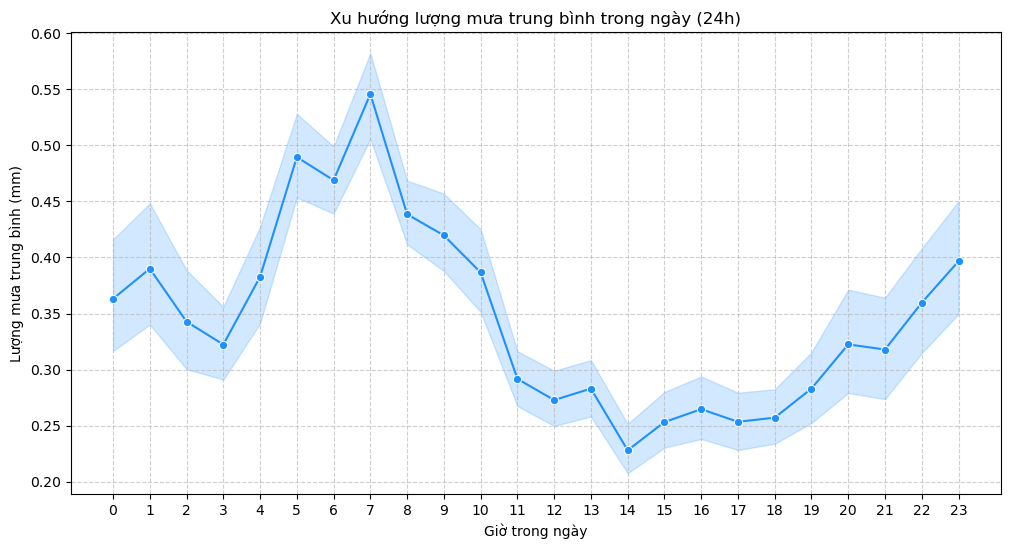

In [6]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="hour", y="precipitation", 
             estimator='mean', errorbar=('ci', 95), marker="o", color="dodgerblue")

plt.title("Xu hướng lượng mưa trung bình trong ngày (24h)")
plt.xlabel("Giờ trong ngày")
plt.ylabel("Lượng mưa trung bình (mm)")
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

**Nhận xét**

- **Đỉnh 7, đáy chiều**: Dữ liệu đạt cực đại ở 7h (~0.55mm), giảm sâu ở khoảng 13-17h. 

- **Khoảng tin cậy**: Quy luật "sáng mưa nhiều" rất ổn định khi sai số (vùng bóng mờ) tương đối nhỏ, ngược lại "chiều ít mưa" lại may rủi hơn khi sai số là lớn nhất trong toàn bộ dữ liệu.

> Dữ liệu mưa tại Huế tuân theo quy luật **"Bất đối xứng**: Bất đối xứng giữa các mùa (Mùa mưa ổn định - Mùa khô nhiễu loạn) và Bất đối xứng trong ngày (Sáng ổn định - Chiều ngẫu nhiên). Thách thức lớn nhất không nằm ở việc dự báo đỉnh lũ tháng 10 (vì nó quá rõ ràng), mà nằm ở việc bắt được các tín hiệu nhiễu vào các tháng chuyển mùa (tháng 4, 6) và khung giờ chiều - nơi độ biến động dữ liệu là lớn nhất.

## Khác biệt về đặc trưng thời tiết giữa mùa mưa và mùa khô

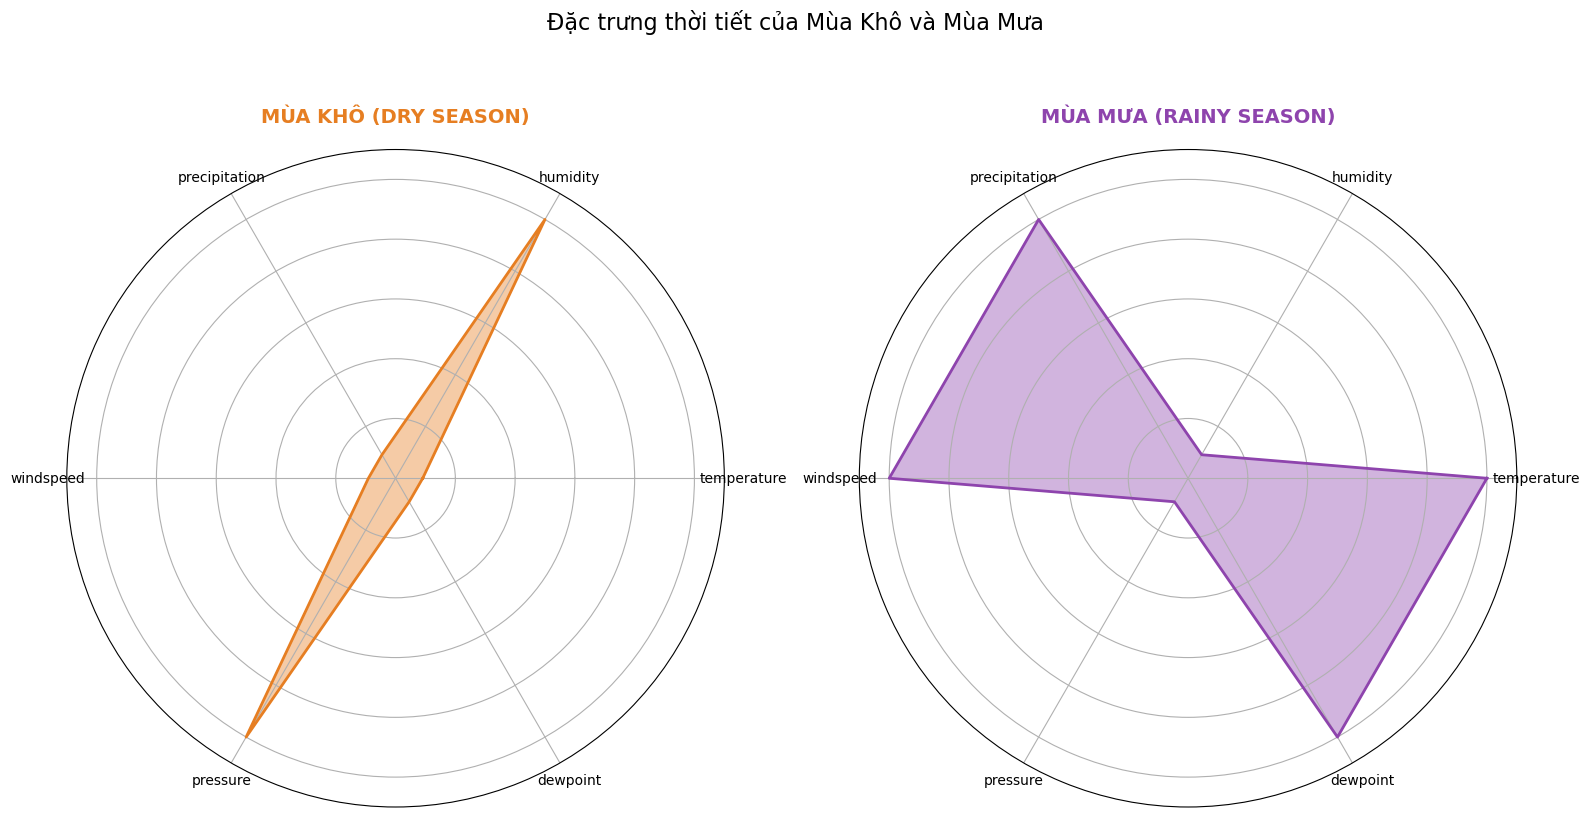

In [7]:
# Chọn các features dạng số (Scalar) có ý nghĩa về độ lớn
features = ['temperature', 'humidity', 'precipitation', 'windspeed', 'pressure', 'dewpoint']

# Gom nhóm và tính trung bình theo mùa
season_stats = df.groupby('season')[features].mean()

# Phải đưa tất cả về thang 0-1 để so sánh được trên cùng biểu đồ tròn
scaler = MinMaxScaler()
# Fit trên toàn bộ dữ liệu (để giữ tương quan giữa 2 mùa)
df_normalized = pd.DataFrame(scaler.fit_transform(season_stats), 
                             columns=features, 
                             index=season_stats.index)

# Thêm một chút base (+0.1) để biểu đồ không dính sát tâm
df_normalized = df_normalized + 0.1
df_normalized = df_normalized / df_normalized.max().max() # Rescale lại về max 1.0

# Số lượng trục
categories = list(df_normalized.columns)
N = len(categories)

# Tính góc cho mỗi trục
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Hàm hỗ trợ vẽ từng biểu đồ con
def create_radar_subplot(ax, season_name, color, title):
    # Lấy dữ liệu
    values = df_normalized.loc[season_name].tolist()
    values += values[:1]
    
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, color=color, alpha=0.4)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, size=10, color='black')
    
    ax.set_yticklabels([])
    ax.set_ylim(0, 1.1)
    
    ax.set_title(title, size=14, fontweight='bold', pad=20, color=color)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), subplot_kw=dict(polar=True))

# Biểu đồ Mùa Khô (Dry) - Màu Cam
if 'Dry' in df_normalized.index:
    create_radar_subplot(ax1, 'Dry', '#e67e22', 'MÙA KHÔ (DRY SEASON)')
else:
    ax1.text(0.5, 0.5, "Không có dữ liệu Dry", ha='center')

# Biểu đồ Mùa Mưa (Rainy) - Màu Tím/Xanh
if 'Rainy' in df_normalized.index:
    create_radar_subplot(ax2, 'Rainy', '#8e44ad', 'MÙA MƯA (RAINY SEASON)')
else:
    ax2.text(0.5, 0.5, "Không có dữ liệu Rainy", ha='center')

plt.suptitle("Đặc trưng thời tiết của Mùa Khô và Mùa Mưa", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

**Nhận xét**:

Tính đối xứng hoàn hảo: Hai biểu đồ Radar tạo thành hai hình dáng đối lập nhau như hai mảnh ghép.

- Mùa Khô: Cấu trúc hình thoi dẹt dọc. Đặc trưng bởi áp suất cao và sự vắng mặt của gió/mưa.

- Mùa Mưa: Cấu trúc hình cánh bướm mở rộng ngang. Đặc trưng bởi sự sụt giảm áp suất, nhưng lại bùng nổ về tốc độ gió, lượng mưa và điểm sương (Dewpoint).

**Vai trò của các đặc trưng**:

- `humidity & dewpoint` (Độ ẩm & Điểm sương): Để có mưa, không khí cần độ ẩm cao. Nhưng vẫn có những ngày độ ẩm cao mà không mưa (oi bức). Ta xem độ ẩm là "điều kiện cần".

- `windspeed` (Tốc độ gió): Ở Huế, gió mùa Đông Bắc mang hơi ẩm từ biển vào. Có thể xem đây là "người vận chuyển".

- `pressure` (Áp suất): Khi áp suất cao, không khí có xu hướng giáng xuống, ngăn cản sự hình thành mây. Dẫn đến việc không có mưa.

- `tempurature` (Nhiệt độ): Trong bối cảnh biểu đồ tổng thể của Huế, nhiệt độ cao là hệ quả của việc không có mưa.

> Biểu đồ cho thấy sự xuất hiện đồng thời của tổ hợp các biến số: Khi Độ ẩm cao + Gió mạnh + Điểm sương cao + Áp suất thấp hội tụ, xác suất xảy ra mưa là cực đại. Ta bắt đầu xem xét đây là các biến dự báo (`Predictors`).

## Xác nhận lại các `Predictors`

### 1. Các yếu tố ảnh hưởng đến khả năng mưa/lượng mưa

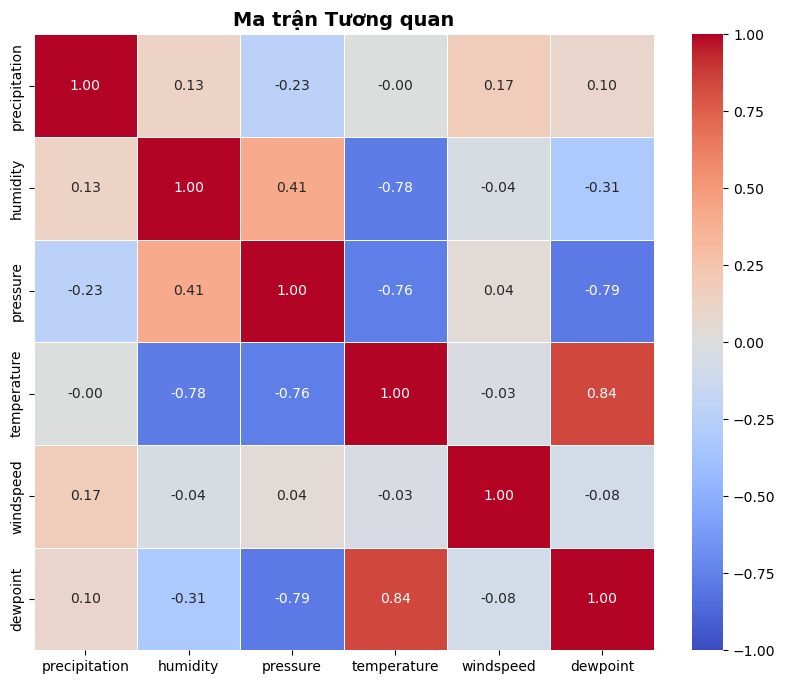

In [8]:
features = ['precipitation', 'humidity', 'pressure', 'temperature', 'windspeed', 'dewpoint']
corr_matrix = rain_df[features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Ma trận Tương quan", fontsize=14, fontweight='bold')
plt.show()

**Nhận xét**: Xét các tương quan với `precipitation`, áp suất thấp cũng mưa (bão), áp suất cao cũng mưa (gió mùa). Khi tính trung bình cộng lại, chúng triệt tiêu nhau khiến tương quan về gần 0.

### 2. Khác biệt về áp suất và độ ẩm ở 2 mùa

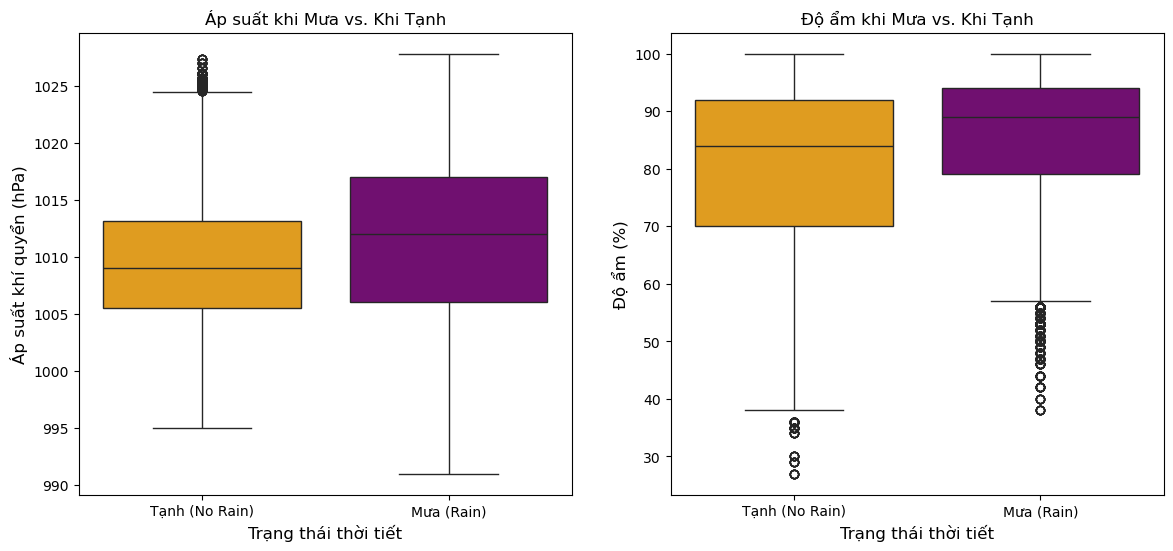

In [9]:
df['weather_status'] = df['precipitation'].apply(lambda x: 'Mưa (Rain)' if x > 0 else 'Tạnh (No Rain)')

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Kiểm tra Áp suất (Pressure)
sns.boxplot(data=df, x='weather_status', y='pressure', hue='weather_status',
            palette={'Mưa (Rain)': 'purple', 'Tạnh (No Rain)': 'orange'}, ax=axes[0])
axes[0].set_title("Áp suất khi Mưa vs. Khi Tạnh")
axes[0].set_xlabel("Trạng thái thời tiết", fontsize=12)
axes[0].set_ylabel("Áp suất khí quyển (hPa)", fontsize=12)

# Kiểm tra Độ ẩm (Humidity)
sns.boxplot(data=df, x='weather_status', y='humidity', hue='weather_status',
            palette={'Mưa (Rain)': 'purple', 'Tạnh (No Rain)': 'orange'}, ax=axes[1])
axes[1].set_title("Độ ẩm khi Mưa vs. Khi Tạnh")
axes[1].set_xlabel("Trạng thái thời tiết", fontsize=12)
axes[1].set_ylabel("Độ ẩm (%)", fontsize=12)

plt.show()

**Nhận xét**: 

- ***Áp suất***: Dữ liệu tổng hợp sẽ cho thấy trung bình áp suất khi mưa nghiêng về phía cao. Dù điều này nghe rất vô lý với kiến thức phổ thông (Mưa = Áp thấp), nhưng lại hoàn toàn đúng với Huế. 

    - Mùa mưa chính của Huế là tháng 10, 11, 12. Đây là thời điểm Không khí lạnh (áp cao) hoạt động mạnh nhất.

    - Tần suất mưa do Không khí lạnh ở Huế nhiều hơn gấp bội so với mưa do bão (áp thấp). Bão chỉ có vài cơn một năm, còn không khí lạnh thì về liên tục từng đợt.

- ***Độ ẩm***: 

    - Khi mưa: Độ ẩm chắc chắn phải cao (hộp co cụm ở trên cao).

    - Khi tạnh: Độ ẩm có thể thấp (nắng hanh) hoặc có thể rất cao (trời nồm, âm u nhưng chưa mưa).

> Mô hình sẽ học được rằng: "Độ ẩm thấp → Chắc chắn tạnh. Độ ẩm cao → Chưa chắc, phải xem thêm Áp suất và Gió".

### 3. Áp suất tác động đến khả năng mưa như thế nào ?

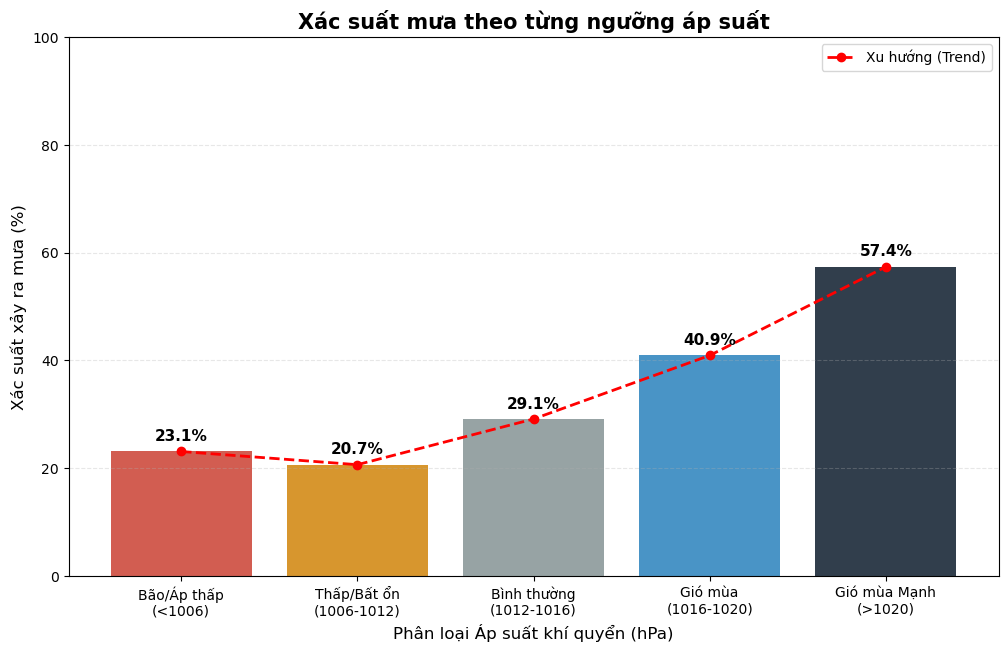

In [10]:
# Định nghĩa các điểm cắt (bins) dựa trên kiến thức khí tượng
# 0 -> 1006: Bão/Áp thấp
# 1006 -> 1012: Thấp/Dông
# 1012 -> 1016: Bình thường (Trung gian)
# 1016 -> 1020: Gió mùa (Chớm lạnh)
# 1020 -> 2000: Gió mùa mạnh (Rét đậm)
pressure_bins = [0, 1006, 1012, 1016, 1020, 2000]
bin_labels = ['Bão/Áp thấp\n(<1006)', 'Thấp/Bất ổn\n(1006-1012)', 
              'Bình thường\n(1012-1016)', 'Gió mùa\n(1016-1020)', 'Gió mùa Mạnh\n(>1020)']

df['pressure_bin'] = pd.cut(df['pressure'], bins=pressure_bins, labels=bin_labels)

# Tính tỉ lệ mưa trong từng nhóm
prob_rain_phys = df.groupby('pressure_bin', observed=False)['weather_status'].apply(lambda x: (x == 'Mưa (Rain)').mean() * 100).reset_index()

plt.figure(figsize=(12, 7))

# Vẽ biểu đồ cột
custom_palette = ["#e74c3c", "#f39c12", "#95a5a6", "#3498db", "#2c3e50"]
sns.barplot(data=prob_rain_phys, x='pressure_bin', y='weather_status', hue='pressure_bin',
            palette=custom_palette)

# Vẽ đường xu hướng
plt.plot(range(5), prob_rain_phys['weather_status'],
         color='red', marker='o', linestyle='--', 
         linewidth=2, label='Xu hướng (Trend)')

plt.title("Xác suất mưa theo từng ngưỡng áp suất", fontsize=15, fontweight='bold')
plt.xlabel("Phân loại Áp suất khí quyển (hPa)", fontsize=12)
plt.ylabel("Xác suất xảy ra mưa (%)", fontsize=12)
plt.ylim(0, 100)

# Hiển thị số liệu
for index, row in prob_rain_phys.iterrows():
    if not np.isnan(row.weather_status): # Kiểm tra nếu có dữ liệu
        plt.text(index, row.weather_status + 2, f"{row.weather_status:.1f}%", 
                 color='black', ha="center", fontweight='bold', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.legend()
plt.show()

***Nhận xét***:

- **Xu hướng tăng dốc đứng**: Từ mức "Bình thường" (35.4%) lên "Gió mùa" (50.9%) và đỉnh điểm là "Gió mùa Mạnh" (68.5%). Áp suất >1020 hPa là dấu hiệu đặc trưng của những đợt Không khí lạnh cường độ mạnh (Gió mùa Đông Bắc) tràn về sâu. Tại Huế, gió này va vào dãy Bạch Mã và Trường Sơn, gây ra mưa cực lớn và dai dẳng.

> Điều này cho thấy `pressure > 1020 hPa` là biến dự báo cực mạnh.

- **Nghịch lý Áp thấp: Tại sao Bão/Áp thấp (<1006) chỉ có 23% mưa?**

    - Nguyên nhân 1: Áp thấp nóng phía Tây. Vào mùa hè (tháng 5, 6, 7), Huế chịu ảnh hưởng của vùng áp thấp nóng. Lúc này áp suất cũng giảm rất thấp (<1006 hPa), nhưng trời không mưa mà lại nắng nóng gay gắt (hiệu ứng gió Lào).
    
    - Nguyên nhân 2: Tần suất bão thấp. Bão gây mưa lớn nhưng tần suất xuất hiện ít. Trong khi đó, áp thấp nóng mùa hè xuất hiện rất nhiều ngày. Dữ liệu mùa hè đã "kéo" xác suất trung bình của nhóm <1006 xuống thấp.
    
> Áp suất thấp ở Huế là con dao hai lưỡi: Hoặc là bão (mưa cực to), hoặc là gió Lào (nắng cực to).

- **Vùng "An toàn": Thấp/Bất ổn (1006-1012 hPa)**:

    - Đây là vùng có xác suất mưa thấp nhất (20.2%).

> Khác với Bắc Bộ hay Nam Bộ (áp thấp thường gây mưa dông), ở Huế khoảng áp suất này thường rơi vào các ngày mùa hè hoặc giai đoạn chuyển mùa ít mưa.

### Áp suất ảnh hưởng đến khả năng mưa và lượng mưa như thế nào ?

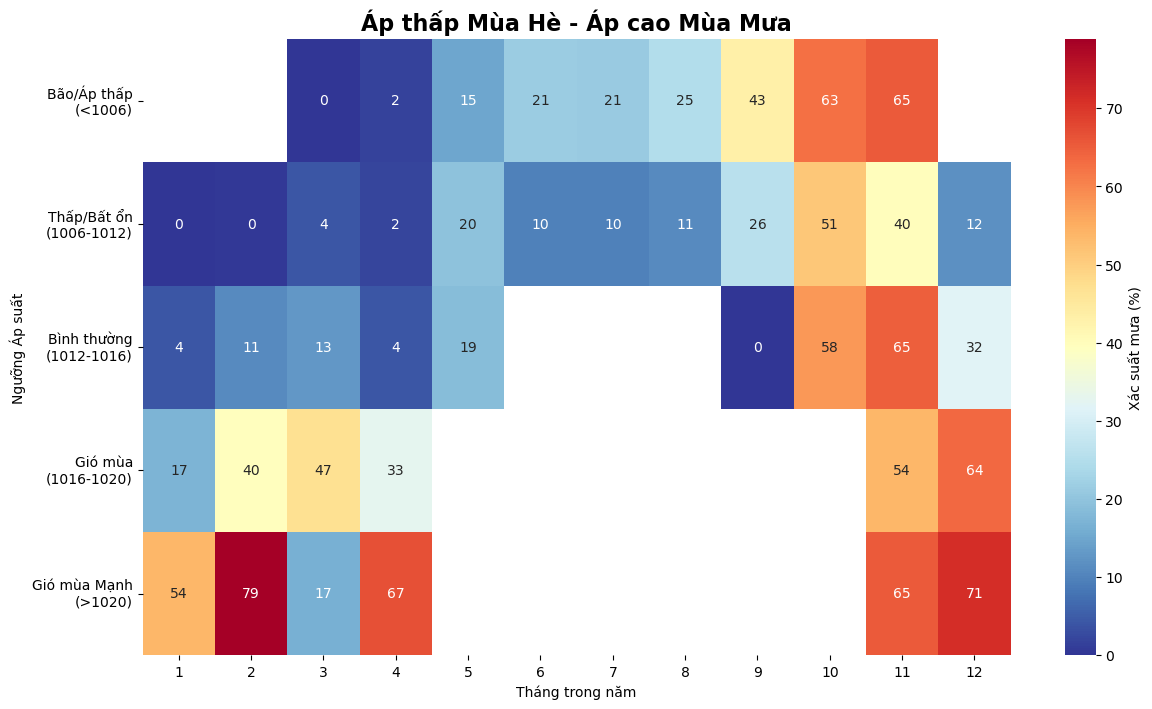

In [11]:
# Tạo cột Tháng và Pressure Bin (nếu chưa có)
df['month'] = df['datetime'].dt.month
# Đảm bảo cột weather_status là 1 (Mưa) và 0 (Tạnh) để tính mean
df['is_rain'] = df['precipitation'] > 0

# Tạo bảng Pivot: Xác suất mưa theo (Tháng x Áp suất)
pivot_table = df.pivot_table(
    index='pressure_bin', 
    columns='month', 
    values='is_rain', 
    aggfunc='mean'
) * 100

# --- VẼ HEATMAP ---
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='RdYlBu_r', annot=True, fmt=".0f", cbar_kws={'label': 'Xác suất mưa (%)'})

plt.title("Áp thấp Mùa Hè - Áp cao Mùa Mưa", fontsize=16, fontweight='bold')
plt.xlabel("Tháng trong năm")
plt.ylabel("Ngưỡng Áp suất")
plt.yticks(rotation=0)

plt.show()

**Nhận xét:**

- **Nghịch Lý Áp Suất & Ngữ Cảnh Mùa Vụ**: Mối quan hệ giữa áp suất và lượng mưa là phi tuyến tính và phụ thuộc hoàn toàn vào bối cảnh mùa.
    
    - **Áp thấp (<1006 hPa)**: Cùng chỉ số nhưng kết quả trái ngược.
        - Mùa Khô: Áp thấp nhiệt &rarr; Hiệu ứng Phơn (Gió Lào) &rarr; Nắng nóng cực đoan.
        
        - Mùa Mưa: Áp thấp nhiệt đới/Bão &rarr; Hội tụ gió &rarr; Mưa lụt diện rộng.

    - **Áp cao (>1016 hPa)**: Phân hóa theo giai đoạn.
        - Mùa xuân (T1-T3): Khí lạnh biến tính lệch đông &rarr; Mưa phùn/Nồm ẩm (Xác suất ~42%, lượng nhỏ).
        
        - Chính đông (T11-T12): Gió mùa ổn định &rarr; Mưa dầm địa hình (Xác suất cao >70%, lượng lớn).
        
- **"Sốc nhiệt" và Mưa trái mùa**: Mưa lớn nhất không sinh ra từ sự ổn định, mà từ sự xung đột giữa các khối khí.
    
    - Quy luật: "Càng trái mùa, phản ứng khí quyển càng dữ dội."
    
    - Hiện tượng giao mùa (Tháng 4-5):

        - Nền nhiệt mặt đất cao (35-40&deg;C) va chạm với Khối khí lạnh tràn về (>1016 hPa).

        - Hệ quả: Giải phóng năng lượng lớn → Bất ổn định khí quyển → Giông, lốc, sét (Xác suất mưa vọt lên 55-100%).

    > Mưa tháng 4 (Do đối lưu nhiệt) khác hoàn toàn bản chất Mưa tháng 12 (Do địa hình chắn gió).
    
- **Tam giác hiệu suất mưa**: Đỉnh mưa Tháng 10 được hình thành do sự hội tụ tối ưu của 3 yếu tố:

    - Máy nén: Gió mùa Đông Bắc (Áp cao) ép gió vào dãy Trường Sơn.

    - Nhiên liệu: Hơi ẩm khổng lồ từ Biển và Dải hội tụ nhiệt đới (Áp thấp).

    - Chất xúc tác: Nền nhiệt mặt biển còn ấm (chưa lạnh hẳn như tháng 12).

        - Suy yếu (Tháng 12): Còn "Máy nén" nhưng thiếu "Nhiên liệu" &rarr; Mưa dai dẳng nhưng giảm cường độ.
        
- **Hàng rào vật lý**: Sự vắng mặt của dữ liệu là minh chứng cho độ tin cậy.

    - Quan sát: Không ghi nhận Áp suất >1020 hPa trong giai đoạn Tháng 5 - Tháng 10.
    
    > Phù hợp tuyệt đối với quy luật khí tượng (Khối khí áp cao lạnh không thể tồn tại dưới nền nhiệt mùa hè nhiệt đới). Dữ liệu phản ánh trung thực, không nhiễu.
    
    
> ***Insight***: Mưa tại Huế là hệ quả của sự tương tác đa chiều: Được khởi phát bởi gió mùa (Áp cao), định hình bởi địa hình, kích hoạt bởi mùa và duy trì bởi độ ẩm. Mô hình dự báo cần tích hợp biến tương tác (Interaction Feature) giữa áp suất và mùa (`pressure x season`) để đạt độ chính xác cao nhất.